In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq
from scipy.interpolate import interp1d
from numpy.linalg import solve



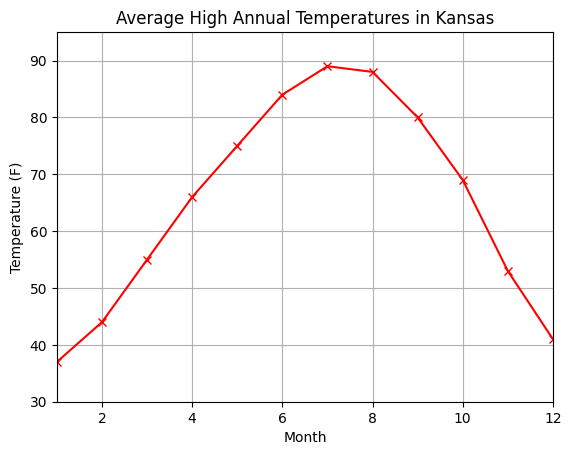

In [11]:
#1

# High temperatures in Kansas (in Fahrenheit)
WeatherHigh = np.array([37, 44, 55, 66, 75, 84, 89, 88, 80, 69, 53, 41])

# Plot the temperatures
plt.figure()
plt.plot(range(1, 13), WeatherHigh, 'r-x')
plt.axis([1, 12, 30, 95])
plt.title('Average High Annual Temperatures in Kansas')
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.show()


In [12]:
#2

# Months: January, May, August, December
x = np.array([1, 5, 8, 12])
V = np.vander(x, increasing=True)

# Select corresponding temperatures
y = WeatherHigh[[0, 4, 7, 11]]

# Solve for polynomial coefficients
CoefHigh = lstsq(V, y, rcond=None)[0]
# Given months: January, May, August, and December
x = np.array([1, 5, 8, 12])
y = WeatherHigh[x-1]  # Select corresponding temperatures

# Generate the Vandermonde matrix
V = np.vander(x, increasing=True)

# Solve for polynomial coefficients
CoefHigh = np.linalg.solve(V, y)

print("Vandermonde Matrix (V):")
print(V)
print("Coefficients of the cubic polynomial (CoefHigh):")
print(CoefHigh)

print("Coefficients of the cubic polynomial:", CoefHigh)


Vandermonde Matrix (V):
[[   1    1    1    1]
 [   1    5   25  125]
 [   1    8   64  512]
 [   1   12  144 1728]]
Coefficients of the cubic polynomial (CoefHigh):
[29.48051948  6.41450216  1.24675325 -0.14177489]
Coefficients of the cubic polynomial: [29.48051948  6.41450216  1.24675325 -0.14177489]


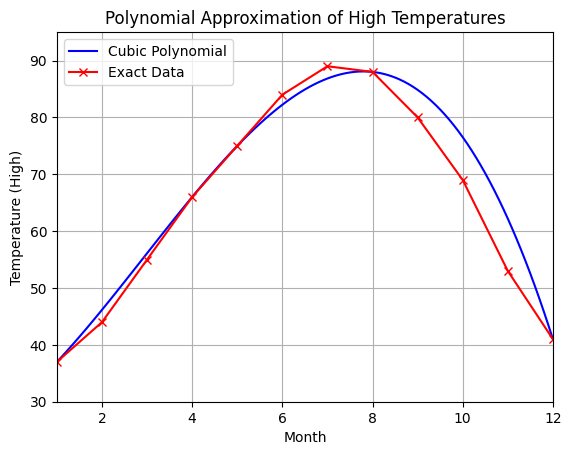

In [13]:
#3

# Evaluate the polynomial at the given set of points
xc = np.arange(1, 12.1, 0.1)
ycHigh = np.polyval(CoefHigh[::-1], xc)  # CoefHigh needs to be reversed for np.polyval

# Plot the polynomial and the original data
plt.figure()
plt.plot(xc, ycHigh, 'b-', label='Cubic Polynomial')
plt.plot(range(1, 13), WeatherHigh, 'r-x', label='Exact Data')
plt.axis([1, 12, 30, 95])
plt.xlabel('Month')
plt.ylabel('Temperature (High)')
plt.title('Polynomial Approximation of High Temperatures')
plt.legend()
plt.grid(True)
plt.show()

Vandermonde Matrix for six months (V_six):
[[     1      1      1      1      1      1]
 [     1      3      9     27     81    243]
 [     1      5     25    125    625   3125]
 [     1      8     64    512   4096  32768]
 [     1     10    100   1000  10000 100000]
 [     1     12    144   1728  20736 248832]]
Coefficients of the 5th degree polynomial (CoefHigh_six):
[ 2.51341991e+01  1.49771284e+01 -4.19289322e+00  1.21778499e+00
 -1.41305916e-01  5.08658009e-03]


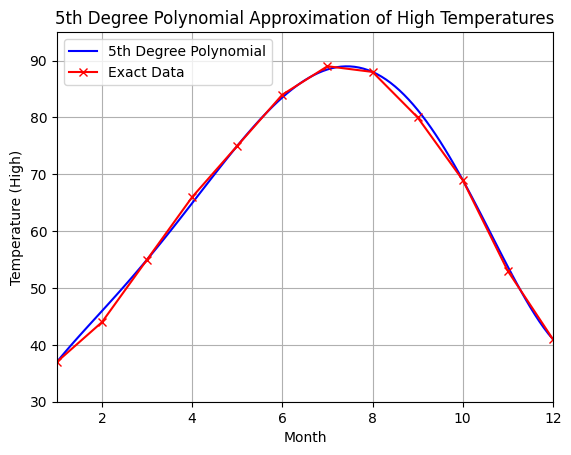

In [14]:
#4


# Given months: January, March, May, August, October, and December
x_six = np.array([1, 3, 5, 8, 10, 12])
y_six = WeatherHigh[x_six - 1]  # Select corresponding temperatures

# Generate the Vandermonde matrix
V_six = np.vander(x_six, increasing=True)

# Solve for polynomial coefficients
CoefHigh_six = np.linalg.solve(V_six, y_six)

print("Vandermonde Matrix for six months (V_six):")
print(V_six)
print("Coefficients of the 5th degree polynomial (CoefHigh_six):")
print(CoefHigh_six)


# Evaluate the polynomial at the given set of points
ycHigh_six = np.polyval(CoefHigh_six[::-1], xc)  # CoefHigh_six needs to be reversed for np.polyval

# Plot the polynomial and the original data
plt.figure()
plt.plot(xc, ycHigh_six, 'b-', label='5th Degree Polynomial')
plt.plot(range(1, 13), WeatherHigh, 'r-x', label='Exact Data')
plt.axis([1, 12, 30, 95])
plt.xlabel('Month')
plt.ylabel('Temperature (High)')
plt.title('5th Degree Polynomial Approximation of High Temperatures')
plt.legend()
plt.grid(True)
plt.show()


Vandermonde Matrix for all twelve months (V_all):
[[          1           1           1           1           1           1
            1           1           1           1           1           1]
 [          1           2           4           8          16          32
           64         128         256         512        1024        2048]
 [          1           3           9          27          81         243
          729        2187        6561       19683       59049      177147]
 [          1           4          16          64         256        1024
         4096       16384       65536      262144     1048576     4194304]
 [          1           5          25         125         625        3125
        15625       78125      390625     1953125     9765625    48828125]
 [          1           6          36         216        1296        7776
        46656      279936     1679616    10077696    60466176   362797056]
 [          1           7          49         343       

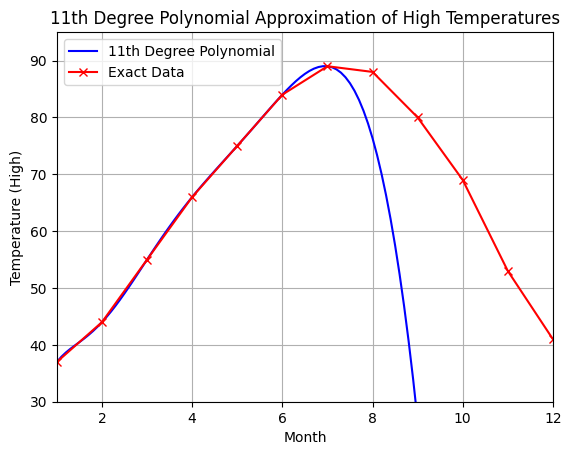

In [15]:
#5

# All twelve months
x_all = np.arange(1, 13)
y_all = WeatherHigh

# Generate the Vandermonde matrix
V_all = np.vander(x_all, increasing=True)

# Solve for polynomial coefficients
CoefHigh_all = np.linalg.solve(V_all, y_all)

print("Vandermonde Matrix for all twelve months (V_all):")
print(V_all)
print("Coefficients of the 11th degree polynomial (CoefHigh_all):")
print(CoefHigh_all)

# Evaluate the polynomial at the given set of points
ycHigh_all = np.polyval(CoefHigh_all[::-1], xc)  # CoefHigh_all needs to be reversed for np.polyval

# Plot the polynomial and the original data
plt.figure()
plt.plot(xc, ycHigh_all, 'b-', label='11th Degree Polynomial')
plt.plot(range(1, 13), WeatherHigh, 'r-x', label='Exact Data')
plt.axis([1, 12, 30, 95])
plt.xlabel('Month')
plt.ylabel('Temperature (High)')
plt.title('11th Degree Polynomial Approximation of High Temperatures')
plt.legend()
plt.grid(True)
plt.show()



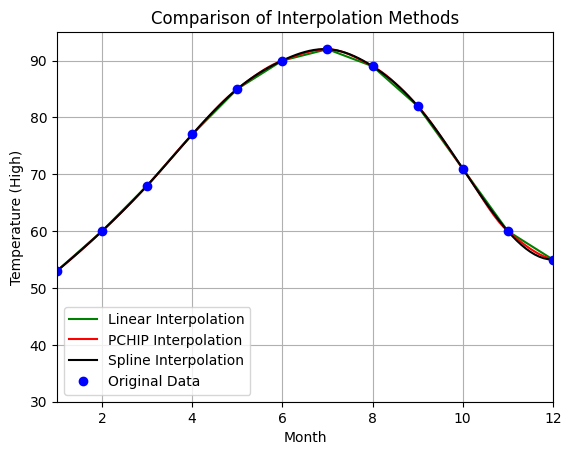

In [16]:
#6 skip

import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.arange(1, 13)
WeatherHigh = np.array([53, 60, 68, 77, 85, 90, 92, 89, 82, 71, 60, 55])

# Points for interpolation
xc = np.arange(1, 12.1, 0.1)

# Linear interpolation
ycHigh1 = np.interp(xc, x, WeatherHigh, left=None, right=None, period=None)

# Piecewise cubic Hermite interpolating polynomial (PCHIP)
from scipy.interpolate import PchipInterpolator
pchip_interpolator = PchipInterpolator(x, WeatherHigh)
ycHigh2 = pchip_interpolator(xc)

# Cubic spline interpolation
from scipy.interpolate import CubicSpline
spline_interpolator = CubicSpline(x, WeatherHigh)
ycHigh3 = spline_interpolator(xc)

# Plot the interpolations
plt.figure()
plt.plot(xc, ycHigh1, 'g-', label='Linear Interpolation')
plt.plot(xc, ycHigh2, 'r-', label='PCHIP Interpolation')
plt.plot(xc, ycHigh3, 'k-', label='Spline Interpolation')
plt.plot(x, WeatherHigh, 'bo', label='Original Data')
plt.axis([1, 12, 30, 95])
plt.xlabel('Month')
plt.ylabel('Temperature (High)')
plt.title('Comparison of Interpolation Methods')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
#7

import scipy.io
from scipy.io import loadmat

# Load temperature data
data = loadmat("temperature.mat")
temperature = data['temperature']

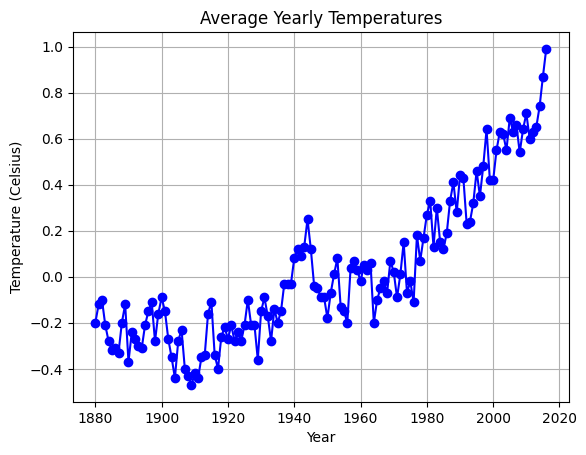

In [18]:
#8

# Separate data into years and temperatures
years = temperature[:, 0]
temp = temperature[:, 1]

# Plot the temperature data
plt.figure()
plt.plot(years, temp, 'b-o')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.title('Average Yearly Temperatures')
plt.grid(True)
plt.show()

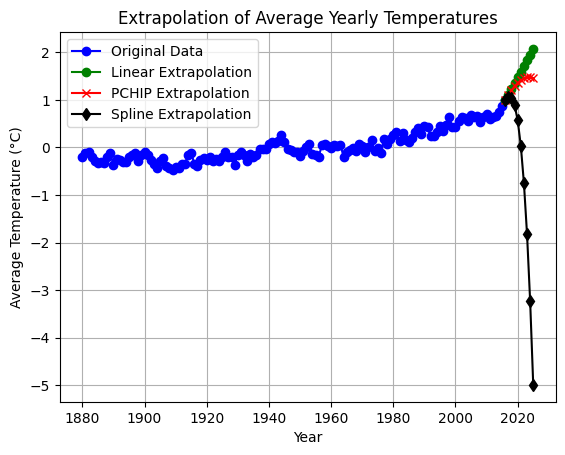

In [19]:
#9 skip

# Define the future years
futureyears = np.arange(2016, 2026)

# Linear extrapolation
linear_interpolator = interp1d(years, temp, kind='linear', fill_value='extrapolate')
futuretemp1 = linear_interpolator(futureyears)

# Piecewise cubic Hermite interpolating polynomial (PCHIP)
pchip_interpolator = PchipInterpolator(years, temp, extrapolate=True)
futuretemp2 = pchip_interpolator(futureyears)

# Cubic spline interpolation
spline_interpolator = CubicSpline(years, temp, extrapolate=True)
futuretemp3 = spline_interpolator(futureyears)

# Plot the extrapolated data
plt.figure()
plt.plot(years, temp, 'b-o', label='Original Data')
plt.plot(futureyears, futuretemp1, 'g-o', label='Linear Extrapolation')
plt.plot(futureyears, futuretemp2, 'r-x', label='PCHIP Extrapolation')
plt.plot(futureyears, futuretemp3, 'k-d', label='Spline Extrapolation')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Extrapolation of Average Yearly Temperatures')
plt.legend()
plt.grid(True)
plt.show()


The average temperature for the past 136 years was 0.0244°C.
Projection matrix P1:
[[0.00729927 0.00729927 0.00729927 ... 0.00729927 0.00729927 0.00729927]
 [0.00729927 0.00729927 0.00729927 ... 0.00729927 0.00729927 0.00729927]
 [0.00729927 0.00729927 0.00729927 ... 0.00729927 0.00729927 0.00729927]
 ...
 [0.00729927 0.00729927 0.00729927 ... 0.00729927 0.00729927 0.00729927]
 [0.00729927 0.00729927 0.00729927 ... 0.00729927 0.00729927 0.00729927]
 [0.00729927 0.00729927 0.00729927 ... 0.00729927 0.00729927 0.00729927]]
Projected temperatures (temp1):
[0.02437956 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956
 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956
 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956
 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956
 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956
 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956 0.02437956
 0.02437956 0.02437956 0.02437956 0.024

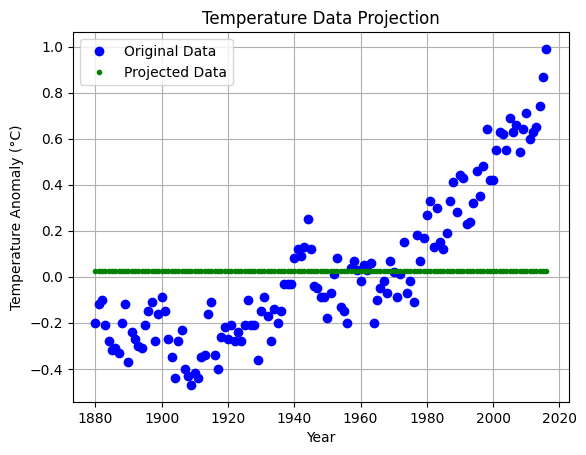

In [20]:
#10,11,12,13

# Calculate the average temperature
average_temp = np.mean(temp)

# Print the average temperature
print(f"The average temperature for the past 136 years was {average_temp:.4f}°C.")

# Calculate orthogonal projection
n = len(temp)
b1 = np.ones(n)
P1 = np.outer(b1, b1) / np.dot(b1, b1)#claculating P1 matrix
temp1 = P1 @ temp#applying projection

# Print projection matrix and projected temperatures
print("Projection matrix P1:")
print(P1)
print("Projected temperatures (temp1):")
print(temp1)

# Plot the results
plt.figure()
plt.plot(years, temp, 'bo', label='Original Data')
plt.plot(years, temp1, 'g.', label='Projected Data')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Data Projection')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#14

# Norm of P1^2 - P1
norm_P1 = np.linalg.norm(P1 @ P1 - P1)
print(f"norm(P1 * P1 - P1) = {norm_P1:.4e}")


norm(P1 * P1 - P1) = 2.0201e-15


In [22]:
#15

from scipy.linalg import orth
# Create the matrix B2
m = len(years)
B2 = np.column_stack((np.ones(m), years))

# Create the orthonormal basis using orth
Q2 = orth(B2)

# Verify the ranks
rank_Q2 = np.linalg.matrix_rank(Q2)
rank_Q2_B2 = np.linalg.matrix_rank(np.column_stack((Q2, B2)))

print(f"Rank of Q2: {rank_Q2}")
print(f"Rank of [Q2, B2]: {rank_Q2_B2}")

# Q3: What kind of matrix is Q2^T Q2? Why?
Q2_T_Q2 = np.dot(Q2.T, Q2)
print("Q2.T @ Q2:")
print(Q2_T_Q2)



Rank of Q2: 2
Rank of [Q2, B2]: 2
Q2.T @ Q2:
[[1.00000000e+00 9.16695487e-17]
 [9.16695487e-17 1.00000000e+00]]


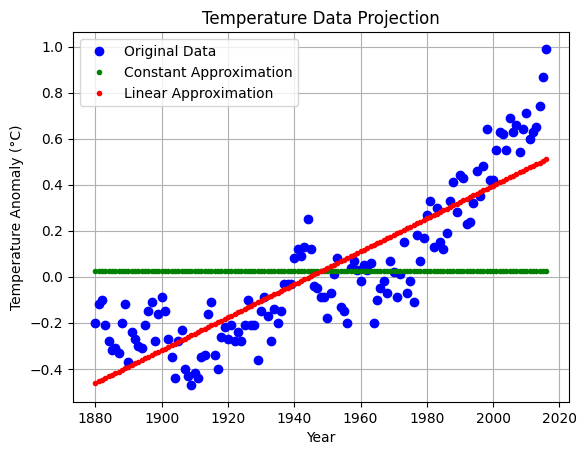

Projected temperatures (temp2):
[-0.46194224 -0.45479045 -0.44763866 -0.44048687 -0.43333508 -0.42618328
 -0.41903149 -0.4118797  -0.40472791 -0.39757612 -0.39042433 -0.38327254
 -0.37612075 -0.36896895 -0.36181716 -0.35466537 -0.34751358 -0.34036179
 -0.33321    -0.32605821 -0.31890642 -0.31175463 -0.30460283 -0.29745104
 -0.29029925 -0.28314746 -0.27599567 -0.26884388 -0.26169209 -0.2545403
 -0.2473885  -0.24023671 -0.23308492 -0.22593313 -0.21878134 -0.21162955
 -0.20447776 -0.19732597 -0.19017417 -0.18302238 -0.17587059 -0.1687188
 -0.16156701 -0.15441522 -0.14726343 -0.14011164 -0.13295984 -0.12580805
 -0.11865626 -0.11150447 -0.10435268 -0.09720089 -0.0900491  -0.08289731
 -0.07574551 -0.06859372 -0.06144193 -0.05429014 -0.04713835 -0.03998656
 -0.03283477 -0.02568298 -0.01853119 -0.01137939 -0.0042276   0.00292419
  0.01007598  0.01722777  0.02437956  0.03153135  0.03868314  0.04583494
  0.05298673  0.06013852  0.06729031  0.0744421   0.08159389  0.08874568
  0.09589747  0.10304

In [23]:
#16

# Projection matrix onto the subspace S
P2 = Q2 @ Q2.T

# Project the temperature data
temp2 = P2 @ temp

# Plot the original and projected temperatures
plt.figure()
plt.plot(years, temp, 'bo', label='Original Data')
plt.plot(years, temp1, 'g.', label='Constant Approximation')
plt.plot(years, temp2, 'r.', label='Linear Approximation')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Data Projection')
plt.legend()
plt.grid(True)
plt.show()

# Display the projected temperatures
print("Projected temperatures (temp2):")
print(temp2)


# Norm of P2^2 - P2
norm_P2 = np.linalg.norm(P2 @ P2 - P2)
print(f"norm(P2 * P2 - P2) = {norm_P2:.4e}")


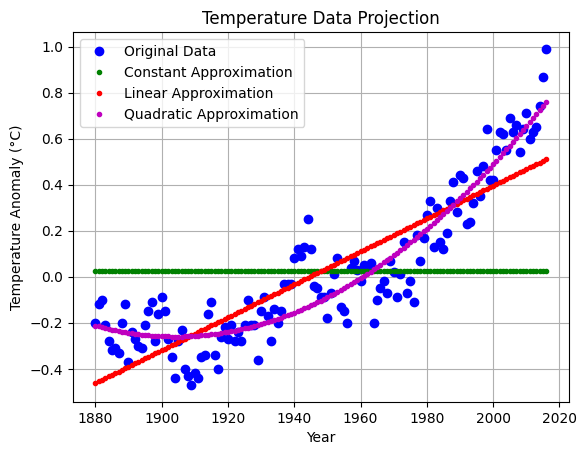

Projected temperatures (temp3):
[-0.21200149 -0.2158765  -0.21958814 -0.22313643 -0.22652136 -0.22974292
 -0.23280113 -0.23569598 -0.23842746 -0.24099559 -0.24340036 -0.24564176
 -0.24771981 -0.2496345  -0.25138582 -0.25297379 -0.2543984  -0.25565965
 -0.25675753 -0.25769206 -0.25846323 -0.25907104 -0.25951548 -0.25979657
 -0.2599143  -0.25986866 -0.25965967 -0.25928732 -0.25875161 -0.25805253
 -0.2571901  -0.25616431 -0.25497516 -0.25362265 -0.25210677 -0.25042754
 -0.24858495 -0.246579   -0.24440968 -0.24207701 -0.23958098 -0.23692159
 -0.23409884 -0.23111272 -0.22796325 -0.22465042 -0.22117423 -0.21753468
 -0.21373176 -0.20976549 -0.20563586 -0.20134287 -0.19688652 -0.19226681
 -0.18748373 -0.1825373  -0.17742751 -0.17215436 -0.16671785 -0.16111798
 -0.15535474 -0.14942815 -0.1433382  -0.13708489 -0.13066822 -0.12408819
 -0.1173448  -0.11043804 -0.10336793 -0.09613446 -0.08873763 -0.08117744
 -0.07345389 -0.06556698 -0.05751671 -0.04930308 -0.04092608 -0.03238573
 -0.02368202 -0.014

In [24]:
#17,18

# Add a column of squared years to the matrix B3
B3 = np.column_stack((np.ones(m), years, years**2))

# Create the orthonormal basis Q3 using the orth function
Q3 = np.linalg.qr(B3)[0]  # Using QR decomposition to get an orthonormal basis

# Projection matrix onto the quadratic subspace
P3 = Q3 @ Q3.T

# Project the temperature data onto the quadratic subspace
temp3 = P3 @ temp

# Plot the original and projected temperatures
plt.figure()
plt.plot(years, temp, 'bo', label='Original Data')
plt.plot(years, temp1, 'g.', label='Constant Approximation')
plt.plot(years, temp2, 'r.', label='Linear Approximation')
plt.plot(years, temp3, 'm.', label='Quadratic Approximation')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Temperature Data Projection')
plt.legend()
plt.grid(True)
plt.show()

# Display the projected temperatures
print("Projected temperatures (temp3):")
print(temp3)

# Norm of P3^2 - P3
norm_P3 = np.linalg.norm(P3 @ P3 - P3)
print(f"norm(P3 * P3 - P3) = {norm_P3:.4e}")


Predicted average temperature for the year 2116: 3.40 °C


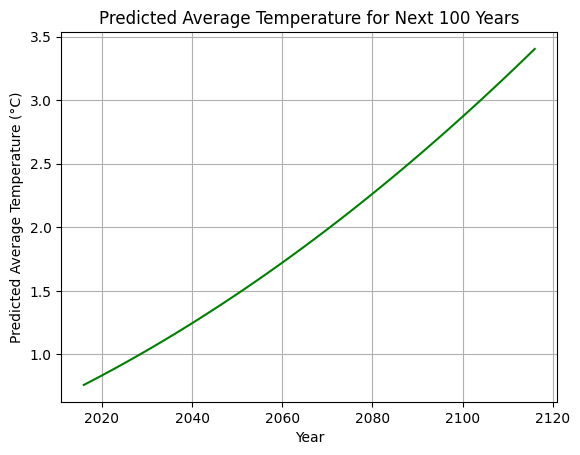

In [25]:
#19

# Define future years for prediction
futureyears = np.arange(2016, 2117)

# Perform spline interpolation and extrapolation for future temperatures
interp_func = interp1d(years, temp3, kind='cubic', fill_value='extrapolate')
futuretemp3 = interp_func(futureyears)

# Create a new figure for plotting
plt.figure()

# Plot future temperature predictions
plt.plot(futureyears, futuretemp3, 'g-')
plt.xlabel('Year')
plt.ylabel('Predicted Average Temperature (°C)')
plt.title('Predicted Average Temperature for Next 100 Years')
plt.grid()

# Display the predicted temperature for 2116
print(f'Predicted average temperature for the year 2116: {futuretemp3[-1]:.2f} °C')

plt.show()